<a href="https://colab.research.google.com/github/Muhamadsulton/kaggle/blob/main/%D1%86%D0%B5%D0%BD%D0%B0_%D0%B4%D0%BE%D0%BC%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Submissionsd.csv to Submissionsd (2).csv


In [ ]:
data = pd.read_csv('train.csv', header = 0, index_col = False)

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# просмотр размерности массива данных
np.shape(data)

(1460, 81)

In [ ]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
data.describe(include = 'object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [ ]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
#функция для просмотра какой процент пропущенных данных мы имеем
def missing_values_table(data):
        # Общее количество пропущенных значений
        mis_val = data.isnull().sum()
        # Доля пропущенных значений
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        # Таблица с результатом расчета
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        # Переименовываем столбцы
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        # Сортируем по столбцу с долей пропущенных значений в порядке убывания
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        # Вывод сводной информации
        print("Ваш датафрейм имеет " + str(data.shape[1]) + " колонок.\n"      
            " " + str(mis_val_table_ren_columns.shape[0]) +
              " колонок имееют пропущенные данные.")
        return mis_val_table_ren_columns

# Статистика пропущенных значений
missing_values = missing_values_table(data)
missing_values.head(20)

Ваш датафрейм имеет 81 колонок.
 19 колонок имееют пропущенные данные.


,Missing Values,% of Total Values
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3
LotFrontage,259,17.7
GarageType,81,5.5
GarageYrBlt,81,5.5
GarageFinish,81,5.5
GarageQual,81,5.5


In [ ]:
#удаляем эти столбцы потому что содержат большое количество пропущенных значений
data = data.drop(['Alley','MiscFeature','PoolQC','FireplaceQu','Fence'], axis = 1)

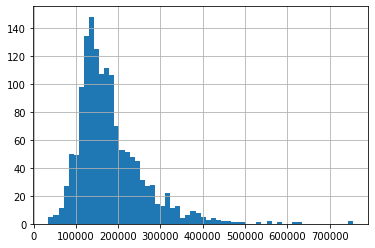

In [ ]:
#строим гистограмму цены продажи наших домов
data['SalePrice'].hist(bins = 60)
plt.show()

In [ ]:
#data["SalePrice"] = np.log1p(data["SalePrice"])

In [ ]:
#data['SalePrice'].hist()

In [ ]:
#тест на нормальность Шапиро - Вилка
from scipy.stats import shapiro
from numpy.random import seed
seed(1)
stat, p = shapiro(data['SalePrice'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# на уровне p - значимости
alpha = 0.05
if p > alpha:
    print('Распределение является нормальным (принимаем гипотезу H0)')
else:
    print('Распределение не явлется нормальным (отклоняем гипотезу H0)')

Statistics=0.870, p=0.000
Распределение не явлется нормальным (отклоняем гипотезу H0)


Text(0.5, 0.98, '')

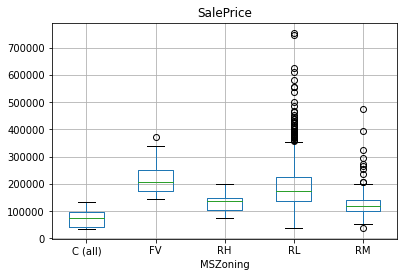

In [ ]:
#строим ящик с усиками по переменной расположения домов и их ценнами
#видно что самые дешевые дома расположены возле Commercial  - C
ax = data.boxplot(column = 'SalePrice', by = 'MSZoning')
ax.get_figure().suptitle('')

In [ ]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,0,1,2008,WD,Normal,118000


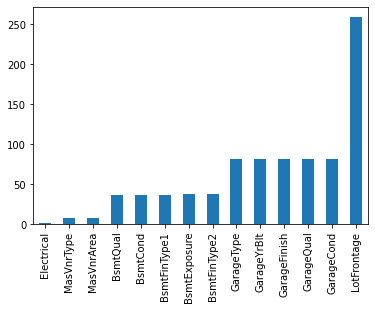

In [ ]:
missing = data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar();

In [ ]:
data.shape

(1460, 76)

In [ ]:
data = data.dropna(axis=0)

In [ ]:
data.shape

(1094, 76)

In [ ]:
data[data['MSZoning'] == 'RL']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Создаем объект label encoder для преоброзования категориальных признаков в числовые
#le = LabelEncoder()
#le_count = 0
# Проходим по всем столбцам
#for col in data:
    #if data[col].dtype == 'object':
        # Если признак имеет 12 или менее уникальных значения
        #if len(list(data[col].unique())) <= 12:
            # Обучаем LabelEncoder на тренировочных данных
            #le.fit(data[col])
            # Трансформируем обучающий и тестовый датафреймы
            #data[col] = le.transform(data[col])
            #data_test[col] = le.transform(data_test[col])
            
            # Подсчитываем, сколько признаков обработано методом LabelEncoder
            #le_count += 1
#print('%d колонок было преобразовано.' % le_count)

In [ ]:
data = pd.get_dummies(data)

In [ ]:
print('Тренировочные данные имеют размерность: ', data.shape)

Тренировочные данные имеют размерность:  (1094, 261)


In [ ]:
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,...,Functional_Min2,Functional_Mod,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,...,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


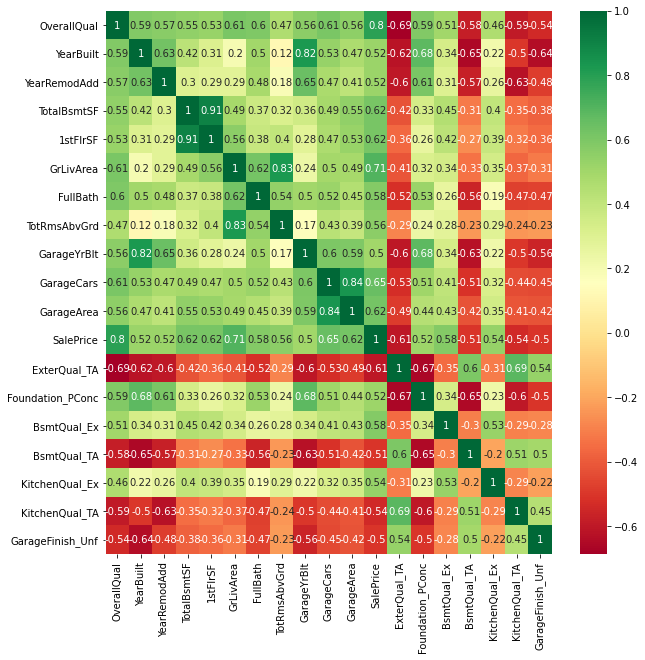

In [ ]:
import seaborn as sns
corr = data.corr()
highest_corr_features = corr.index[abs(corr["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(data[highest_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
# Найдем корреляцию признаков с целевой меткой и отсортируем результат
correlations = data.corr()['SalePrice'].sort_values()
# Отобразим результат вычислений
print('Положительная корреляция:\n', correlations.tail(30))
print('\n Отрицательная корреляция:\n', correlations.head(30))

Положительная корреляция:
 OpenPorchSF              0.338600
LotFrontage              0.343978
MasVnrType_Stone         0.347827
SaleCondition_Partial    0.369081
SaleType_New             0.375677
BsmtFinSF1               0.378678
Neighborhood_NridgHt     0.419984
GarageFinish_Fin         0.434506
ExterQual_Gd             0.436096
HeatingQC_Ex             0.450056
BsmtFinType1_GLQ         0.454509
Fireplaces               0.458182
ExterQual_Ex             0.475711
MasVnrArea               0.485409
GarageYrBlt              0.502248
Foundation_PConc         0.518413
YearRemodAdd             0.519806
YearBuilt                0.523434
KitchenQual_Ex           0.535441
TotRmsAbvGrd             0.560521
FullBath                 0.578299
BsmtQual_Ex              0.580979
1stFlrSF                 0.617692
TotalBsmtSF              0.617741
GarageArea               0.620772
GarageCars               0.652103
GrLivArea                0.707481
OverallQual              0.795437
SalePrice            

In [ ]:
#берем корреляцию столбцов по модулю
data_corr1 = data.corr()['SalePrice'].abs()

In [ ]:
#ставим ограничения, если корреляиция меньше 0.4 то отбрасываем ее
data_corr1 = data_corr1.where(data_corr1 > 0.4)

In [ ]:
#удаляем значения корреляций у которых меньше 0.5
data_corr1 = data_corr1.dropna()

In [ ]:
data_corr1

OverallQual             0.795437
YearBuilt               0.523434
YearRemodAdd            0.519806
MasVnrArea              0.485409
TotalBsmtSF             0.617741
1stFlrSF                0.617692
GrLivArea               0.707481
FullBath                0.578299
TotRmsAbvGrd            0.560521
Fireplaces              0.458182
GarageYrBlt             0.502248
GarageCars              0.652103
GarageArea              0.620772
SalePrice               1.000000
Neighborhood_NridgHt    0.419984
ExterQual_Ex            0.475711
ExterQual_Gd            0.436096
ExterQual_TA            0.605346
Foundation_PConc        0.518413
BsmtQual_Ex             0.580979
BsmtQual_TA             0.508959
BsmtFinType1_GLQ        0.454509
HeatingQC_Ex            0.450056
KitchenQual_Ex          0.535441
KitchenQual_TA          0.537959
GarageType_Detchd       0.411295
GarageFinish_Fin        0.434506
GarageFinish_Unf        0.504576
Name: SalePrice, dtype: float64

In [ ]:
#df = data[['OverallQual','YearRemodAdd','MasVnrArea','BsmtQual','HeatingQC','1stFlrSF','FullBath','KitchenQual','TotRmsAbvGrd','Fireplaces','GarageType'
 #          ,'GarageFinish','GarageCars','GarageArea','SalePrice']]

df = data[['OverallQual','YearRemodAdd','MasVnrArea','1stFlrSF','GrLivArea','TotRmsAbvGrd','Fireplaces'
          ,'GarageCars','GarageArea','Neighborhood_NridgHt','BsmtQual_Ex','BsmtFinType1_GLQ','KitchenQual_Ex',
           'KitchenQual_TA','GarageType_Detchd','GarageFinish_Unf','SalePrice']]

In [ ]:
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,Lasso,LassoCV,ElasticNet, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
#стандартизация признаков
standard = StandardScaler()

In [ ]:
X_train_scaled = standard.fit_transform(X_train)
X_test_scaled = standard.fit_transform(X_test)

In [ ]:
dummy = DummyRegressor(strategy = 'mean')

In [ ]:
dummy.fit(X_train_scaled,y_train)
dummy.score(X_test_scaled,y_test)

-0.00045175230179150816

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

ЛИНЕЙНАЯ РЕГРЕССИЯ

In [ ]:
linear = LinearRegression()

In [ ]:
linear.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred_linear = linear.predict(X_test_scaled)

In [ ]:
linear.score(X_test_scaled,y_test)

0.8452774945659409

In [ ]:
np.sqrt(mean_squared_error(y_test,linear.predict(X_test_scaled)))

33374.34618188693

In [ ]:
mean_absolute_error(y_test,linear.predict(X_test_scaled))

21812.227670429733

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,cross_val_score
from sklearn.pipeline import make_pipeline

КРОСС ВАЛИДАЦИЯ И К-БЛОЧНАЯ КРОСС-ВАЛИДАЦИЯ 

In [ ]:
#кросс - валидация
cross_lin = cross_val_score(linear,X,y,cv = 10,scoring = 'r2', n_jobs = -1)

In [ ]:
cross_lin.mean()

0.7929519969626087

In [ ]:
kf_lin = KFold(n_splits = 10,shuffle = True,random_state = 41)

In [ ]:
cv_results_lin = cross_val_score(linear,X,y,cv = kf_lin,scoring = "r2",n_jobs = -1)

In [ ]:
cv_results_lin.mean()

0.7365038032937402

In [ ]:
lasso = Lasso(random_state=17)
lasso_cv = LassoCV(random_state=17)
ridge = Ridge(random_state=17)
ridge_cv = RidgeCV()
elass = ElasticNet(random_state=17)
elassCV = ElasticNetCV(random_state=17)

In [ ]:
def train_valid_score(model,X_train_scaled,y_train,X_test_scaled,y_test,feature_names,forest=False):
  model.fit(X_train_scaled,y_train)
  #для лин моделей и случайного леса
  print("MSE=%f" % np.sqrt(mean_squared_error(y_test,model.predict(X_test_scaled))))
  print("coef of model")
  coef = model.feature_importances_ if forest else model.coef_
  coef_name = 'Importance' if forest else 'Coef'
  print(pd.DataFrame(coef,feature_names,columns=[coef_name]).sort_values(by=coef_name,ascending=False))

In [ ]:
#как видим ветер негативно влияет на прокат велосипедов потому что значение его коэффициента отрицательный
train_valid_score(lasso_cv,X_train_scaled,y_train,X_test,y_test,feature_names=df.columns[:-1])

MSE=42201717.916559
coef of model
                              Coef
OverallQual           20446.094322
GrLivArea             18176.959145
GarageCars            10203.061293
BsmtQual_Ex            9976.021043
KitchenQual_Ex         7329.365650
BsmtFinType1_GLQ       5658.291986
Fireplaces             3847.342896
YearRemodAdd           3492.384390
1stFlrSF               3481.849748
MasVnrArea             2838.091379
GarageArea             2515.551877
TotRmsAbvGrd           2406.376121
Neighborhood_NridgHt   2253.951254
GarageFinish_Unf      -2231.793716
GarageType_Detchd     -2473.623806
KitchenQual_TA        -2682.429892


In [ ]:
lasso.fit(X_train_scaled,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=17,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
np.sqrt(mean_squared_error(y_test,lasso.predict(X_test_scaled)))

33374.32141191069

In [ ]:
mean_absolute_error(y_test,lasso.predict(X_test_scaled))

21812.085041887745

In [ ]:
ridge.fit(X_train_scaled,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=17, solver='auto', tol=0.001)

In [ ]:
#как видим ветер негативно влияет на прокат велосипедов потому что значение его коэффициента отрицательный
train_valid_score(ridge,X_train_scaled,y_train,X_test_scaled,y_test,feature_names=df.columns[:-1])

MSE=33384.757658
coef of model
                              Coef
OverallQual           18102.644307
GrLivArea             17294.398552
BsmtQual_Ex           10444.940136
GarageCars            10035.159687
KitchenQual_Ex         8144.844596
BsmtFinType1_GLQ       6726.005443
Fireplaces             5300.779754
YearRemodAdd           4435.939797
TotRmsAbvGrd           4286.335154
MasVnrArea             3811.394138
1stFlrSF               3599.874293
Neighborhood_NridgHt   3141.297715
GarageArea             2786.328450
GarageFinish_Unf      -2573.469083
GarageType_Detchd     -3455.739663
KitchenQual_TA        -3573.043447


In [ ]:
np.sqrt(mean_squared_error(y_test,ridge.predict(X_test_scaled)))

33384.757657682996

In [ ]:
mean_absolute_error(y_test,ridge.predict(X_test_scaled))

21812.653615929685

In [ ]:
elass.fit(X_train_scaled,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=17, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
#как видим ветер негативно влияет на прокат велосипедов потому что значение его коэффициента отрицательный
train_valid_score(elass,X_train_scaled,y_train,X_test_scaled,y_test,feature_names=df.columns[:-1])

MSE=35902.038600
coef of model
                              Coef
OverallQual           12275.466877
GrLivArea             10877.010310
BsmtQual_Ex            8551.144970
GarageCars             7436.554546
KitchenQual_Ex         7354.476849
TotRmsAbvGrd           7351.155958
BsmtFinType1_GLQ       5781.660321
1stFlrSF               5597.416583
Fireplaces             5589.693371
GarageArea             5567.831730
YearRemodAdd           5057.887647
MasVnrArea             4896.555041
Neighborhood_NridgHt   3767.651457
GarageType_Detchd     -3394.285269
GarageFinish_Unf      -3741.636759
KitchenQual_TA        -5317.739415


In [ ]:
mean_absolute_error(y_test,elass.predict(X_test_scaled))

22397.026502527253

In [ ]:
np.sqrt(mean_squared_error(y_test,elass.predict(X_test_scaled)))

35902.03860044763

In [ ]:
#как видим ветер негативно влияет на прокат велосипедов потому что значение его коэффициента отрицательный
train_valid_score(lasso_cv,X_train_scaled,y_train,X_test_scaled,y_test,feature_names=df.columns[:-1])

MSE=34021.622149
coef of model
                              Coef
OverallQual           20446.094322
GrLivArea             18176.959145
GarageCars            10203.061293
BsmtQual_Ex            9976.021043
KitchenQual_Ex         7329.365650
BsmtFinType1_GLQ       5658.291986
Fireplaces             3847.342896
YearRemodAdd           3492.384390
1stFlrSF               3481.849748
MasVnrArea             2838.091379
GarageArea             2515.551877
TotRmsAbvGrd           2406.376121
Neighborhood_NridgHt   2253.951254
GarageFinish_Unf      -2231.793716
GarageType_Detchd     -2473.623806
KitchenQual_TA        -2682.429892


In [ ]:
#как видим ветер негативно влияет на прокат велосипедов потому что значение его коэффициента отрицательный
train_valid_score(ridge_cv,X_train_scaled,y_train,X_test_scaled,y_test,feature_names=df.columns[:-1])

MSE=33475.128515
coef of model
                              Coef
OverallQual           17832.420229
GrLivArea             16749.519184
BsmtQual_Ex           10392.651863
GarageCars             9783.100237
KitchenQual_Ex         8122.360441
BsmtFinType1_GLQ       6701.677654
Fireplaces             5370.169254
TotRmsAbvGrd           4680.194046
YearRemodAdd           4488.111759
MasVnrArea             3895.694120
1stFlrSF               3737.937583
Neighborhood_NridgHt   3148.311138
GarageArea             3045.396825
GarageFinish_Unf      -2628.015481
GarageType_Detchd     -3439.756376
KitchenQual_TA        -3704.403926


In [ ]:
#как видим ветер негативно влияет на прокат велосипедов потому что значение его коэффициента отрицательный
train_valid_score(elassCV,X_train_scaled,y_train,X_test_scaled,y_test,feature_names=df.columns[:-1])

MSE=79015.278499
coef of model
                            Coef
OverallQual           911.435156
GrLivArea             804.201114
GarageCars            764.179192
GarageArea            735.589145
1stFlrSF              696.351400
BsmtQual_Ex           681.169681
TotRmsAbvGrd          658.452418
KitchenQual_Ex        617.321765
YearRemodAdd          597.508296
MasVnrArea            561.973866
BsmtFinType1_GLQ      521.464212
Fireplaces            496.576327
Neighborhood_NridgHt  487.234987
GarageType_Detchd    -456.382600
GarageFinish_Unf     -562.464976
KitchenQual_TA       -638.157631


In [ ]:
from sklearn.metrics import r2_score

ПОЛИНОМИАЛЬНАЯ РЕГРЕССИЯ

In [ ]:
#полиномиальная регрессия
poly = PolynomialFeatures(degree = 2)

In [ ]:
X_poly = poly.fit_transform(X)

In [ ]:
poly_reg = LinearRegression()

In [ ]:
# полиномиальная регрессия 
poly_reg.fit(X_poly, y)
poly_pred = poly_reg.predict(X_poly)

rmse = np.sqrt(mean_squared_error(y,poly_pred))
r2 = r2_score(y,poly_pred)
print(rmse)
print(r2)

25549.430172164797
0.9055341265795301


КРОСС ВАЛИДАЦИЯ И К-БЛОЧНАЯ КРОСС-ВАЛИДАЦИЯ 

In [ ]:
#кросс - валидация полиномиальной регресии 
cross_poly = cross_val_score(poly_reg,X,y,scoring = 'r2')

In [ ]:
cross_poly.mean()

0.7843372054450743

In [ ]:
kf_poly = KFold(n_splits = 10,shuffle = True,random_state = 41)

In [ ]:
cv_results_poly = cross_val_score(poly_reg,X,y,cv = kf_poly,scoring = "r2",n_jobs = -1)

In [ ]:
cv_results_poly.mean()

0.7365038032937402

ДЕРЕВЬЯ РЕШЕНИЙ

In [ ]:
#регрессия дерева принятия решения
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree = DecisionTreeRegressor(max_depth=10,min_samples_leaf=10,min_samples_split=2,criterion='mse',random_state = 241)
tree_model = tree.fit(X_train,y_train)
pred_tree = tree_model.predict(X_test_scaled)

In [ ]:

#для деревья регрессии
print(tree.score(X_test, y_test))

0.7853360672655095


In [ ]:
mean_absolute_error(y_test,tree.predict(X_test_scaled))

106608.98296836982

In [ ]:
np.sqrt(mean_squared_error(y_test,tree.predict(X_test_scaled)))

135763.09356873258

КРОСС ВАЛИДАЦИЯ И К-БЛОЧНАЯ КРОСС-ВАЛИДАЦИЯ 

In [ ]:
#кросс валидация на дереве регрессии
cross_tree = cross_val_score(tree, X, y, cv=10,scoring = "r2", n_jobs = -1)

In [ ]:
cross_tree.mean()

0.7725806418365608

In [ ]:
#к- блочная кросс - валидация на дереве регрессии 
#pipline_clf = make_pipeline(standard,tree)
kf_tree = KFold(n_splits = 10,shuffle = True,random_state = 41)

In [ ]:
cv_results_tree = cross_val_score(tree,X,y,cv = kf_tree,scoring = "r2",n_jobs = -1)

In [ ]:
cv_results_tree.mean()

0.7341455155979031

СЛУЧАЙНЫЕ ЛЕСА

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
randomforest = RandomForestRegressor(max_depth=10,min_samples_leaf=4,min_samples_split=2,criterion='mse', random_state = 241, n_jobs = -1)
model = randomforest.fit(X_train_scaled,y_train) 

In [ ]:
#для случайного леса регрессии 
print(randomforest.score(X_test_scaled, y_test))

0.8377447735521114


In [ ]:
np.sqrt(mean_squared_error(y_test,randomforest.predict(X_test_scaled)))

34177.112596120816

In [ ]:
mean_absolute_error(y_test,randomforest.predict(X_test_scaled))

21774.975847401987

КРОСС ВАЛИДАЦИЯ И К-БЛОЧНАЯ КРОСС-ВАЛИДАЦИЯ 

In [ ]:
#кросс валидация для случайного леса
cross_randmf = cross_val_score(randomforest, X,y, cv=10,scoring = "r2", n_jobs = -1)

In [ ]:
cross_randmf.mean()

0.8265964388302602

In [ ]:
#k-блочная перекрестная проверка на случайном лесе
pipline_randmf = make_pipeline(standard, randomforest)
kf_randmf = KFold(n_splits = 10,shuffle = True,random_state = 41)

In [ ]:
cv_results_randmf = cross_val_score(pipline_randmf,X,y,cv = kf_randmf, scoring = "r2",n_jobs = -1)

In [ ]:
cv_results_randmf.mean()

0.7847444127426956

БЛИЖАЙШИЕ СОСЕДИ

In [ ]:
# К-ближайших соседей регрессия
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
reg_knn = KNeighborsRegressor(n_neighbors=2)

In [ ]:
knn = reg_knn.fit(X_train_scaled, y_train)
print(knn.score(X_test_scaled, y_test))

0.7588353308745412


In [ ]:
np.sqrt(mean_squared_error(y_test,reg_knn.predict(X_test_scaled)))

41667.060529037495

In [ ]:
mean_absolute_error(y_test,reg_knn.predict(X_test_scaled))

25977.95802919708

КРОСС ВАЛИДАЦИЯ И К-БЛОЧНАЯ КРОСС-ВАЛИДАЦИЯ 

In [ ]:
#кросс валидация для k ближайших соседей
cross_knn = cross_val_score(reg_knn, X, y, cv=10,scoring = "r2", n_jobs = -1)

In [ ]:
cross_knn.mean()

0.5668056300674913

In [ ]:
cross_knn

array([0.51152477, 0.69365842, 0.65615435, 0.20441674, 0.6644326 ,
       0.69167355, 0.66440654, 0.48357217, 0.60196389, 0.49625327])

In [ ]:
#k-блочная перекрестная проверка
pipline_knn = make_pipeline(standard,reg_knn )
kf_knn = KFold(n_splits = 10,shuffle = True,random_state = 41)

In [ ]:
cv_results_knn = cross_val_score(pipline_randmf,X,y,cv = kf_knn, scoring = "r2",n_jobs = -1)

In [ ]:
cv_results_knn.mean()

0.7847444127426956

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

ADABOOST REGRESSOR

In [ ]:
adaboost = AdaBoostRegressor()

In [ ]:
model_adaboost = adaboost.fit(X_train_scaled,y_train)

In [ ]:
print(model_adaboost.score(X_test_scaled,y_test))

0.8131451391736704


In [ ]:
print(mean_absolute_error(y_test,adaboost.predict(X_test_scaled)))
print(np.sqrt(mean_squared_error(y_test,adaboost.predict(X_test_scaled))))

27358.550489033078
36676.52846530507


КРОСС ВАЛИДАЦИЯ И К-БЛОЧНАЯ КРОСС-ВАЛИДАЦИЯ 

In [ ]:
#k-блочная перекрестная проверка
#pipline_knn = make_pipeline(standard,reg_knn )
kf_adaboost = KFold(n_splits = 10,shuffle = True,random_state = 41)

In [ ]:
cv_results_adaboost = cross_val_score(adaboost,X,y,cv = kf_knn, scoring = "r2",n_jobs = -1)

In [ ]:
cv_results_adaboost.mean()

0.7060792941480749

ПОДБОР ГИППЕРПАРМЕТРОВ ДЛЯ МОДЕЛЕЙ

In [ ]:
from sklearn.model_selection import GridSearchCV

БЛИЖАЙШИЕ СОСЕДИ

In [ ]:
n_neighbors = range(1,22)
params_knn = {'n_neighbors':n_neighbors}

In [ ]:
grid_knn = GridSearchCV(knn,params_knn,scoring='r2',cv=5,verbose=1,n_jobs=-1)

In [ ]:
best_model_knn = grid_knn.fit(X_test_scaled,y_test)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    0.4s finished


In [ ]:
best_model_knn.best_params_

{'n_neighbors': 4}

Деревья решений

In [ ]:
params_tree = {
    'max_depth' : range(1,21),
    'min_samples_split': range(2,11),
    'min_samples_leaf':range(2,11)
}

In [ ]:
grid_tree = GridSearchCV(tree,params_tree,scoring='r2',cv=5,verbose=1,n_jobs=-1)

In [ ]:
best_model_tree = grid_tree.fit(X_train_scaled,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 1620 candidates, totalling 8100 fits


[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 5588 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 8100 out of 8100 | elapsed:   26.3s finished


In [ ]:
best_model_tree.best_params_

{'max_depth': 6, 'min_samples_leaf': 7, 'min_samples_split': 2}

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test1.csv to test1 (3).csv


In [ ]:
te = pd.read_csv('test1.csv')

In [ ]:
te.shape

(1459, 80)

In [ ]:
#test = te[['OverallQual','YearRemodAdd','MasVnrArea','BsmtQual','HeatingQC','1stFlrSF','FullBath','KitchenQual','TotRmsAbvGrd','Fireplaces','GarageType',
           #'GarageFinish','GarageCars','GarageArea']]

In [ ]:
te = pd.get_dummies(te)

In [ ]:
test  = te[['OverallQual','YearRemodAdd','MasVnrArea','1stFlrSF','GrLivArea','TotRmsAbvGrd','Fireplaces'
          ,'GarageCars','GarageArea','Neighborhood_NridgHt','BsmtQual_Ex','BsmtFinType1_GLQ','KitchenQual_Ex',
           'KitchenQual_TA','GarageType_Detchd','GarageFinish_Unf']]

In [ ]:
#функция для просмотра какой процент пропущенных данных мы имеем
def missing_values_table(test):
        # Общее количество пропущенных значений
        mis_val = test.isnull().sum()
        # Доля пропущенных значений
        mis_val_percent = 100 * test.isnull().sum() / len(test)
        # Таблица с результатом расчета
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        # Переименовываем столбцы
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        # Сортируем по столбцу с долей пропущенных значений в порядке убывания
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        # Вывод сводной информации
        print("Ваш датафрейм имеет " + str(data.shape[1]) + " колонок.\n"      
            " " + str(mis_val_table_ren_columns.shape[0]) +
              " колонок имееют пропущенные данные.")
        return mis_val_table_ren_columns

# Статистика пропущенных значений
missing_values = missing_values_table(test)
missing_values.head(15)

Ваш датафрейм имеет 261 колонок.
 3 колонок имееют пропущенные данные.


,Missing Values,% of Total Values
MasVnrArea,15,1.0
GarageCars,1,0.1
GarageArea,1,0.1


In [ ]:
#test['TotalBsmtSF'].median()

988.0

In [ ]:
#test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(988.0)

In [ ]:
#test['GarageYrBlt'].mode()

0    2005.0
dtype: float64

In [ ]:
#test['GarageYrBlt'] = test['GarageYrBlt'].fillna(2005.0)

In [ ]:
test['MasVnrArea'].median()

0.0

In [ ]:
test['MasVnrArea'] = test['MasVnrArea'].fillna(0.0)

In [ ]:
#test['GarageFinish'].mode()

In [ ]:
#test['GarageFinish'] = test['GarageFinish'].fillna('unf')

In [ ]:
#test['KitchenQual'].mode()

In [ ]:
#test['KitchenQual'] = test['KitchenQual'].fillna('TA')

In [ ]:
test['GarageCars'].mode()

0    2.0
dtype: float64

In [ ]:
test['GarageCars'] = test['GarageCars'].fillna(2.0)

In [ ]:
#test['GarageType'].mode()

In [ ]:
#test['GarageType'] = test['GarageType'].fillna('Attchd')

In [ ]:
#test['BsmtQual'].mode()

In [ ]:
#test['BsmtQual'] = test['BsmtQual'].fillna('TA')

In [ ]:
#test['MasVnrArea'].median()

In [ ]:
#test['MasVnrArea'] = test['MasVnrArea'].fillna(0.0)

In [ ]:
test['GarageArea'].median()

480.0

In [ ]:
test['GarageArea']= test['GarageArea'].fillna(480.0)

In [ ]:
# Создаем объект label encoder для преоброзования категориальных признаков в числовые
#le = LabelEncoder()
#le_count = 0
# Проходим по всем столбцам
#for col in test:
    #if test[col].dtype == 'object':
        # Если признак имеет 12 или менее уникальных значения
        #if len(list(test[col].unique())) <= 12:
            # Обучаем LabelEncoder на тренировочных данных
            #le.fit(test[col])
            # Трансформируем обучающий и тестовый датафреймы
            #test[col] = le.transform(test[col])
            #data_test[col] = le.transform(data_test[col])
            
            # Подсчитываем, сколько признаков обработано методом LabelEncoder
            #le_count += 1
#print('%d колонок было преобразовано.' % le_count)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OverallQual           1459 non-null   int64  
 1   YearRemodAdd          1459 non-null   int64  
 2   MasVnrArea            1459 non-null   float64
 3   1stFlrSF              1459 non-null   int64  
 4   GrLivArea             1459 non-null   int64  
 5   TotRmsAbvGrd          1459 non-null   int64  
 6   Fireplaces            1459 non-null   int64  
 7   GarageCars            1459 non-null   float64
 8   GarageArea            1459 non-null   float64
 9   Neighborhood_NridgHt  1459 non-null   uint8  
 10  BsmtQual_Ex           1459 non-null   uint8  
 11  BsmtFinType1_GLQ      1459 non-null   uint8  
 12  KitchenQual_Ex        1459 non-null   uint8  
 13  KitchenQual_TA        1459 non-null   uint8  
 14  GarageType_Detchd     1459 non-null   uint8  
 15  GarageFinish_Unf     

In [ ]:
test = standard.transform(test)

In [ ]:
test_poly = poly.fit_transform(test)

In [ ]:
final_pred = poly_reg.predict(test_poly)

In [ ]:
predict = pd.DataFrame(final_pred)

In [ ]:
forest_pred = randomforest.predict(test)

In [ ]:
forest = pd.DataFrame(forest_pred)

In [ ]:
forest

,0
0,121308.446256
1,143303.637037
2,182421.035484
3,188102.585112
4,214696.216673
...,...
1454,92267.225033
1455,90387.054831
1456,145484.896573
1457,130605.896799


In [ ]:
lasso_predict = lasso.predict(test)

In [ ]:
lasso_df = pd.DataFrame(lasso_predict)

In [ ]:
lasso_df

,0
0,100597.134385
1,137642.985686
2,176544.433519
3,198682.958268
4,187430.112551
...,...
1454,71663.975064
1455,89034.676968
1456,142101.103511
1457,106276.046566


In [ ]:
lin = linear.predict(test)

In [ ]:
linear_df = pd.DataFrame(lin)

In [ ]:
lin

array([100596.44963546, 137642.58480138, 176546.04427886, ...,
       142100.03764575, 106276.89989412, 228498.08955243])

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sample_submission.csv to sample_submission (3).csv


In [ ]:
sub_d = pd.read_csv('sample_submission.csv')
sub_d['SalePrice'] = linear_df
sub_d.to_csv('Submissionsd.csv', index = False)

In [ ]:
from google.colab import files
uploaded = files.download('Submissionsd.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>